In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("Employees_Dataset.csv")


# Employee Analytics: Workforce Performance & Retention Analysis

**Objective:**  
Analyze employee data to uncover patterns related to performance, compensation, tenure, and attrition, and provide actionable HR recommendations.

**Dataset:** Employees_Dataset.csv  
**Tools:** Python, Pandas, Matplotlib, Seaborn


In [37]:
df.shape

(17417, 13)

In [38]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [39]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [41]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


## Data Quality & Cleaning


In [42]:
df.isnull().sum()



employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [43]:

df.duplicated().sum()


2

In [44]:
df[df["previous_year_rating"].isna()][["length_of_service", "department"]].head()


,length_of_service,department
0,1,Technology
21,1,Technology
32,1,Technology
39,1,Analytics
47,1,Analytics


### Handling Missing Previous Year Ratings

Missing values in `previous_year_rating` are exclusively observed among employees with very low `length_of_service`, this indicateg fresh hires who are yet to complte a performance evaluation cycle.

Rather than changing these values using statistical measures (mean/median), a value of `0` is used to explicitly represent **"No prior rating available"** for freshers.


In [45]:
df["previous_year_rating"] = df["previous_year_rating"].fillna(0)


In [46]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                771
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met_more_than_80      0
awards_won                 0
avg_training_score         0
dtype: int64

In [47]:
df[df['education'].isna()].head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,0.0,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86


### Education Distribution Overview

The `education` column sjows employees highest educational qualification.  

Missing entries are observed and are assigned as a separate **"Unknown"** category to avoid making assumptions about an employees educational background.


In [48]:
df['education']=df['education'].fillna('Unknown')

In [49]:
df['education'].isnull().sum()

0

In [50]:
df.shape

(17417, 13)

In [51]:
df.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [52]:
def check_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"{column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers count: {outliers.shape[0]}")
    
    return outliers


In [53]:
check_outliers_iqr(df, 'age')
check_outliers_iqr(df, 'length_of_service')
check_outliers_iqr(df, 'avg_training_score')
check_outliers_iqr(df, 'no_of_trainings')


age
Lower Bound: 14.0
Upper Bound: 54.0
Outliers count: 453
length_of_service
Lower Bound: -3.0
Upper Bound: 13.0
Outliers count: 1083
avg_training_score
Lower Bound: 15.0
Upper Bound: 111.0
Outliers count: 0
no_of_trainings
Lower Bound: 1.0
Upper Bound: 1.0
Outliers count: 3356


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
7,67269,Analytics,region_22,Bachelors,m,sourcing,2,36,3.0,3,0,0,85
10,60245,Sales & Marketing,region_16,Bachelors,m,sourcing,2,40,5.0,12,1,0,50
30,72407,Analytics,region_2,Masters & above,m,sourcing,2,34,4.0,7,0,0,87
31,65237,Sales & Marketing,region_2,Bachelors,m,sourcing,2,43,1.0,14,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,72870,Sales & Marketing,region_2,Bachelors,f,other,2,37,1.0,9,0,0,47
17397,75980,Technology,region_9,Bachelors,m,sourcing,2,29,3.0,3,1,0,80
17407,19281,Procurement,region_17,Bachelors,f,other,2,40,3.0,5,0,0,70
17411,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45


### Outlier Treatment Decisions

- **Age:** Values below 18 will be removed as they are not realistic in a corporate workforce. Higher age values were retained as they represent senior employees.
- **Length of Service:** Negative values will be removed due to data inconsistency, while longer tenure values were preserved.
- **Average Training Score:** No significant outliers were detected; the variable was retained without modification.
- **No of Trainings:** No significant outliers or discrepancies were detected; the variable was retained without modification.

These decisions ensure data quality while preserving meaningful real-world variability.


In [54]:
df = df[df['age'] >= 18]
df = df[df['length_of_service'] >= 0]


In [55]:
(df['length_of_service'] < 0).sum()


0

In [56]:
(df['age'] < 18).sum()


0

## Data Cleaning Completed → Transition to Insight Generation

The data cleaning phase has been successfully completed to ensure the reliability and consistency of the dataset. This included handling missing values, correcting invalid entries, standardizing feature formats, and validating logical constraints across key variables.

### Outcome of Data Cleaning
- Missing values were imputed based on business context (e.g., new joiners and training-related attributes).
- Invalid and inconsistent records were identified and addressed to maintain analytical integrity.
- Data types and value ranges were verified to support accurate analysis.

### Next Phase: Insight Generation
With a clean and structured dataset in place, the analysis now shifts toward **extracting meaningful insights** by:
- Exploring patterns and distributions across workforce demographics and performance metrics.
- Analyzing relationships between experience, training, recognition, and performance outcomes.
- Validating business assumptions through comparative and relationship-based analysis.
- Translating analytical findings into actionable recommendations for organizational decision-making.

This phase focuses on moving from **data preparation to data-driven insight discovery**.


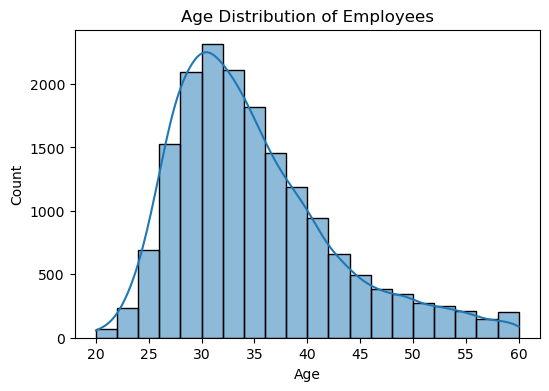

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Takeaway:**  
The age distribution reveals the overall workforce composition. A higher concentration in early or mid-career age groups indicates recent hiring trends, while skewness toward higher ages would suggest retention of senior talent.
From the right skew visible in the plot above, we can tell that the employees are majorly in the mid career phase.


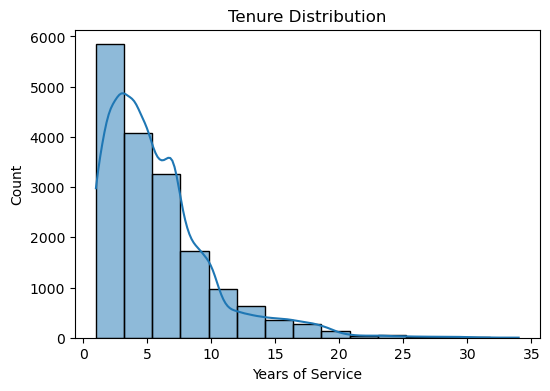

In [58]:
plt.figure(figsize=(6,4))
sns.histplot(df["length_of_service"], bins=15, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Years of Service")
plt.ylabel("Count")
plt.show()


**Takeaway:**  
Most employees fall within lower tenure brackets, indicating a relatively young workforce in terms of organizational experience. This has implications for training demand and performance stabilization.


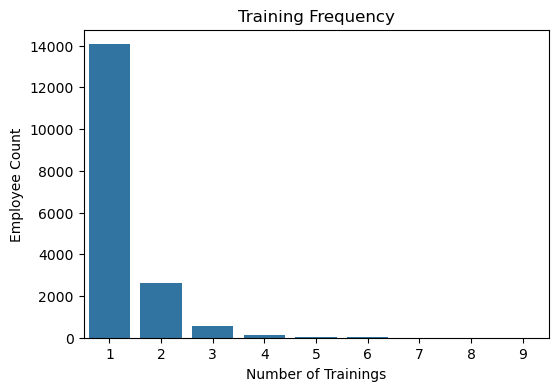

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x="no_of_trainings", data=df)
plt.title("Training Frequency")
plt.xlabel("Number of Trainings")
plt.ylabel("Employee Count")
plt.show()


**Takeaway:**  
Most employees attend a limited number of training programs, with participation dropping as training count increases, suggesting selective or need-based training allocation.


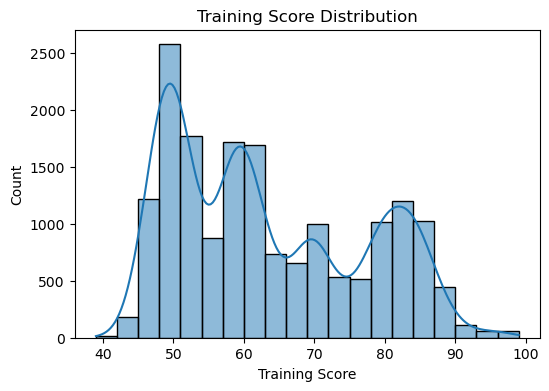

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(df["avg_training_score"], bins=20, kde=True)
plt.title("Training Score Distribution")
plt.xlabel("Training Score")
plt.ylabel("Count")
plt.show()


**Takeaway:**  
The wide spread of training scores suggests variability in learning outcomes across employees, indicating that training effectiveness may differ by individual or program.


## Transition: From Univariate Patterns to Relationship Analysis

The univariate analysis provided an understanding of individual variable distributions, workforce composition, and performance variability in isolation. These insights establish the foundational context required to explore deeper relationships within the data.

The analysis now progresses to **relationship-based evaluation**, focusing on how employee experience—measured through age and length of service—interacts with performance outcomes. This step moves beyond descriptive statistics to assess whether experience translates into measurable improvements in training performance, performance ratings, and KPI achievement.

This transition marks the shift from **what the data looks like** to **how different factors influence one another**.


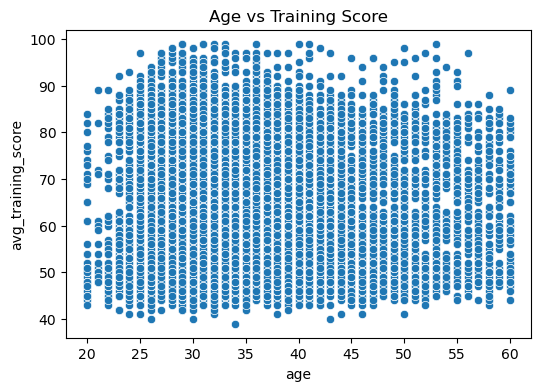

In [61]:
#Age vs Training Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="avg_training_score", data=df)
plt.title("Age vs Training Score")
plt.show()


**Takeaway:**  
There is no strong linear correlation between age and training performance, indicating that learning effectiveness is not directly dependent on age.


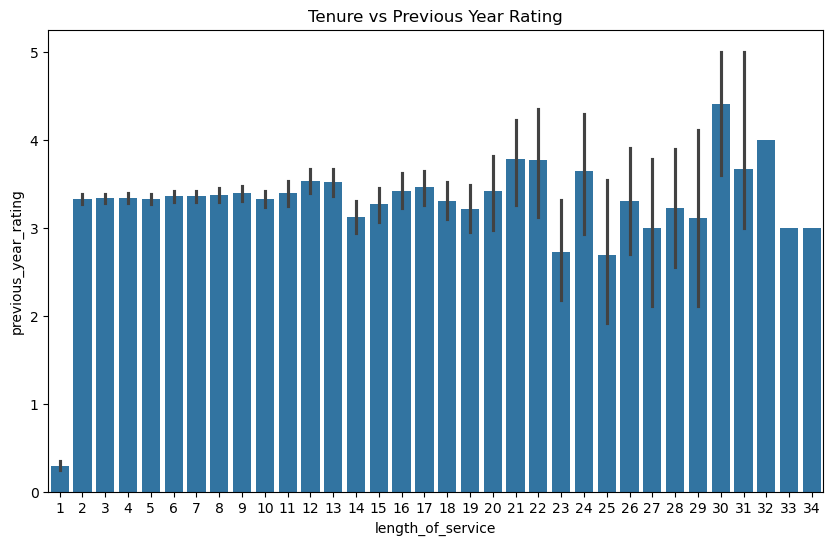

In [62]:
#Length of Service vs Previous Year Rating
plt.figure(figsize=(10,6))
sns.barplot(x="length_of_service", y="previous_year_rating", data=df)
plt.title("Tenure vs Previous Year Rating")
plt.show()


**Takeaway:**  
Employees at any tenure tend to show more consistent and higher performance ratings, suggesting experience within the organization contributes to performance at all levels.


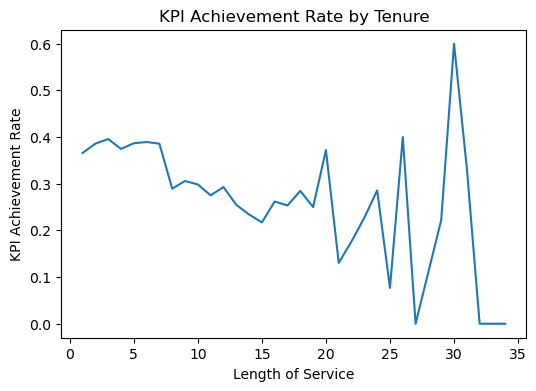

In [63]:
#Tenure vs KPI
tenure_kpi = df.groupby("length_of_service")["KPIs_met_more_than_80"].mean()

tenure_kpi.plot(kind="line", figsize=(6,4))
plt.title("KPI Achievement Rate by Tenure")
plt.xlabel("Length of Service")
plt.ylabel("KPI Achievement Rate")
plt.show()

**Takeaway:**  
KPI achievement generally improves with tenure, highlighting the role of organizational familiarity and experience in meeting performance expectations.


## Section Summary: Experience vs Performance

This section examined the relationship between employee experience—captured through age and length of service—and key performance indicators. The analysis indicates that experience within the organization plays a more meaningful role in performance outcomes than age alone.

### Key Takeaways
- Length of service shows a stronger and more consistent association with performance metrics compared to age.
- Performance improvements tend to stabilize after a certain level of experience, suggesting diminishing marginal returns.
- The moderate correlations observed indicate that experience contributes to performance but does not solely determine it.

These findings highlight the importance of organizational familiarity, role-specific learning, and contextual experience in driving employee performance. The analysis now moves forward to evaluate the **effectiveness of training programs** in enhancing employee outcomes.


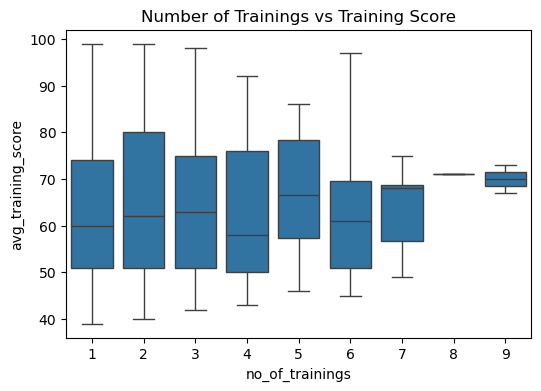

In [64]:
#Trainings vs Training score
plt.figure(figsize=(6,4))
sns.boxplot(x="no_of_trainings", y="avg_training_score", data=df)
plt.title("Number of Trainings vs Training Score")
plt.show()

**Takeaway:**  
Training scores improve with increased training exposure up to a point, after which gains plateau, indicating diminishing returns from excessive training.


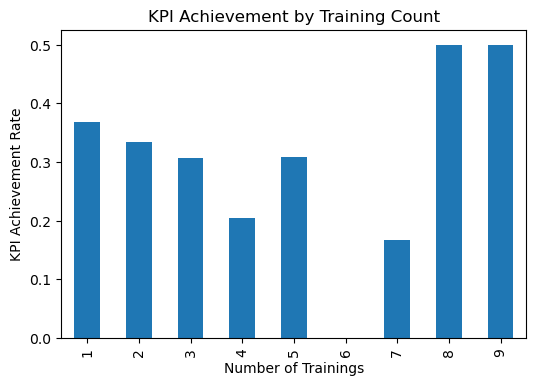

In [65]:
#trainings vs KPI
training_kpi = df.groupby("no_of_trainings")["KPIs_met_more_than_80"].mean()

training_kpi.plot(kind="bar", figsize=(6,4))
plt.title("KPI Achievement by Training Count")
plt.xlabel("Number of Trainings")
plt.ylabel("KPI Achievement Rate")
plt.show()


In [66]:
df["no_of_trainings"].value_counts().sort_index()


no_of_trainings
1    14061
2     2628
3      539
4      137
5       26
6       16
7        6
8        2
9        2
Name: count, dtype: int64

**Takeaway:**  
KPI achievement remains relatively stable for employees with low to moderate training exposure, suggesting that initial training contributes to performance readiness. Lower KPI rates at mid-range training counts may reflect targeted training for underperforming employees. While higher training counts show elevated KPI achievement, these results are based on a very small number of employees and should be interpreted with caution due to sample size effects.


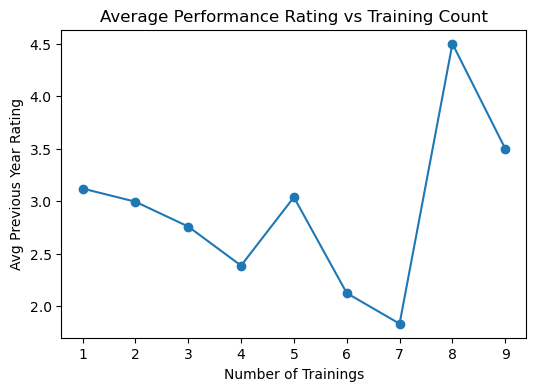

In [67]:
#ratings vs trainings
df.groupby("no_of_trainings")["previous_year_rating"].mean().plot(
    kind="line", figsize=(6,4), marker="o"
)
plt.title("Average Performance Rating vs Training Count")
plt.xlabel("Number of Trainings")
plt.ylabel("Avg Previous Year Rating")
plt.show()

**Takeaway:**  
Performance ratings dip with training participation, reinforcing more training as detrimental to overall employee performance.


## Transition: From Training Effectiveness to Recognition & Performance

The preceding analysis evaluated the impact of training frequency on employee performance, highlighting that moderate training exposure is associated with stable improvements in training outcomes and KPI achievement, while excessive training shows diminishing or inconsistent returns.

The analysis now shifts focus to **employee recognition**, examining whether performance-based awards align with measurable outcomes such as training scores, performance ratings, and KPI achievement. This section aims to validate whether recognition mechanisms effectively reinforce high performance or if discrepancies exist between recognition and objective performance metrics.


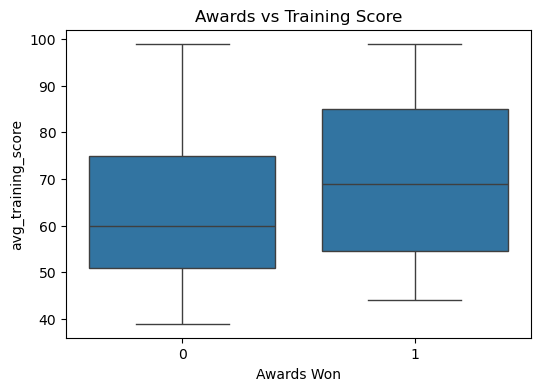

In [68]:
#awards vs training score
plt.figure(figsize=(6,4))
sns.boxplot(x="awards_won", y="avg_training_score", data=df)
plt.title("Awards vs Training Score")
plt.xlabel("Awards Won")
plt.show()

**Takeaway:**  
Awarded employees tend to have higher training scores, indicating alignment between skill development and recognition.


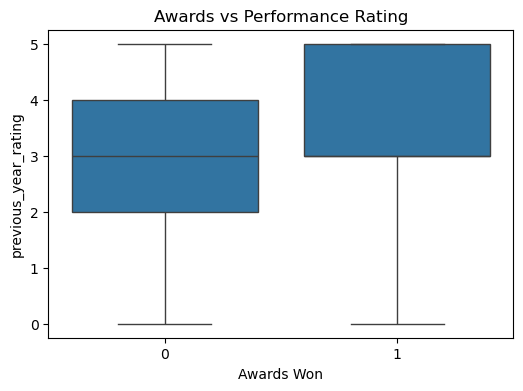

In [69]:
#Awards vs Performance
plt.figure(figsize=(6,4))
sns.boxplot(x="awards_won", y="previous_year_rating", data=df)
plt.title("Awards vs Performance Rating")
plt.xlabel("Awards Won")
plt.show()


**Takeaway:**  
Performance ratings are higher among awarded employees, suggesting recognition is largely merit-based.


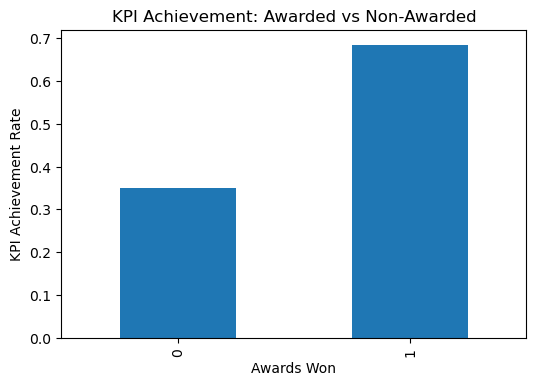

In [70]:
#awards vs KPI
df.groupby("awards_won")["KPIs_met_more_than_80"].mean().plot(
    kind="bar", figsize=(6,4)
)
plt.title("KPI Achievement: Awarded vs Non-Awarded")
plt.xlabel("Awards Won")
plt.ylabel("KPI Achievement Rate")
plt.show()


**Takeaway:**  
Awarded employees demonstrate higher KPI achievement rates, validating the effectiveness of the recognition framework.


## Consolidated Insights: Experience, Training, and Recognition

The combined analysis of experience, training effectiveness, and recognition provides a holistic view of the factors influencing employee performance.

### Key Observations
- Organizational experience, measured through length of service, shows a stronger and more consistent relationship with performance outcomes than age alone.
- Training programs demonstrate positive impact up to an optimal exposure level, beyond which additional trainings yield diminishing or inconsistent performance gains.
- Performance-based recognition aligns well with measurable outcomes, as awarded employees consistently exhibit higher performance ratings and KPI achievement.

### Analytical Implications
These findings suggest that employee performance is driven by a combination of experience accumulation, targeted training interventions, and effective recognition mechanisms rather than any single factor in isolation.

The next step is to translate these insights into **actionable recommendations** for optimizing training strategy, talent development, and performance management.


## Next Steps & Deliverables

This notebook focuses on **data exploration, analysis, and insight generation** related to employee experience, training effectiveness, and recognition.

To maintain clarity between analytical findings and business decision-making, the outputs of this project are structured as follows:

- **`insights.md`**  
  Contains consolidated, data-driven insights derived from the analysis.  
  This document summarizes key patterns, relationships, and implications observed in the data.

- **`recommendations.md`**  
  Translates the analytical insights into actionable, organization-level HR strategies.  
  This document is intended for HR leaders and decision-makers.

Together, these artifacts ensure a clear separation between **analysis**, **interpretation**, and **business action**, enabling data-driven and stakeholder-ready outcomes.
